##**Task 9 : Hypothesis Testing**
* Hypothesis testing is generally used when you are comparing two or more groups. 
* The hypothesis is a statement, assumption or claim about the value of the parameter (mean, variance, median etc.).
* Hypothesis Testing could be used to interpret and draw conclusions about the population using sample data.

* There are two sorts of hypothesis and both the Null Hypothesis (Ho) and Alternative Hypothesis (Ha) must be totally mutually exclusive events.

    1. **Null hypothesis** is usually the hypothesis that the event won't happen.
    2. **Alternative hypothesis** is a hypothesis that the event will happen.
 

**Why we need Hypothesis Testing?**
 
Suppose a company needs to launch a new bicycle in the market. For this situation, they will follow Hypothesis Testing all together decide the success of the new product in the market.

Where the likelihood of the product being ineffective in the market is undertaken as the Null Hypothesis and the likelihood of the product being profitable is undertaken as an Alternative Hypothesis. By following the process of Hypothesis testing they will foresee the accomplishment.

#Steps for Hypothesis Testing:
**Step 1:** Understanding the scenario and plot the Null hypothesis and Alternate hypothesis

**Step 2:** Collecting a sample of size N and computing its mean.

**Step 3:** Calculate the test statistic value t.

The formula for calculating t is given as,
 $t = \frac{\bar{x} - \mu}{{s}/\sqrt[2]{n}}$     
Where,
t = Test value
$\bar{x}$ = Mean of the sample
$\mu$ = Mean of the population
s = standard deviation of the sample/sample_std
N = Sample size

**Step 4:** We should chooce the significance level of our hypothesis which is denoted by α. The lower the significance level, the more confident you can be in replicating your results.
Let us assume the confidence level is 95% i.e. 0.95
α = 1 - confidence level
Therefore α = 0.05

**Step 5:** Deciding the type of test.
We have to decide the type of test depending on the context of hypothesis. The tests are,
1. Two-tailed test

2. One-tailed test

You can tell the type of the test and the position of the critical region on the basis of the ‘sign’ in the alternate hypothesis.

$>$ in H₁ → Upper-tailed test → Rejection region on right side of distribution      
≠  in H₁ → Two-tailed test → Rejection region on both sides of distribution     
$<$ in H₁ → Lower-tailed test → Rejection region on left side of distribution      


**Q1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?**


In [136]:
#import important libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import statistics
from scipy.stats import t

**Step - 2: Collect a sample of size N  Compute sample mean $ \bar{x} \  $**

* Let us collect 10 biriyani packets to form a sample i.e. N = 10.
* Sample = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] 

In [137]:
pop_mean = 500 #Given
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
sample_size = len(l) #length of sample
sample_mean = sum(l)/len(l) 
print("Sample Mean = {}".format(sample_mean))

Sample Mean = 465.3


**Step 3: Compute Test Statistic**                    
* Calculating t-score:    $t = \frac{\bar{x} - \mu}{{s}/\sqrt[2]{n}}$         
* Where s is standard deviation of the sample s:   $s = \sqrt[2]\frac{\sum{\bar{x} - \mu}}{{n-1}} $

In [138]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / len(l)**0.5
    return numerator / denomenator

In [139]:
sample_std=statistics.stdev(l)
print("Standard deviation = {}".format(sample_std))

Standard deviation = 86.84859110991829


In [140]:
t_val = t_score(sample_size, sample_mean, pop_mean, sample_std)
print("T-score = {}".format(t_val))

T-score = -1.263475128444671


**Step 4: Decide α or significance level**

In [141]:
confidence_interval = 0.95
alpha = 1 - confidence_interval

In [142]:
t_critical = t.ppf(1-alpha/2,df = N-1)     #df=degree of freedom --> N-1 = 10-1 = 9
print("T-critical value =  {}".format(t_critical))

T-critical value =  2.093024054408263


**Step 5.1: Calculating two tailed test**

In [143]:
if(np.abs(t_val) > t_critical):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


**Step 5.2: Compute p-value**

In [144]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_val)))
print("P-value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

P-value =  0.20641847943818137
Fail to reject Null Hypothesis


**Step 6: Ploting the sampling distribution with rejection regions**

Text(465.3, 0.0007, 'x_bar')

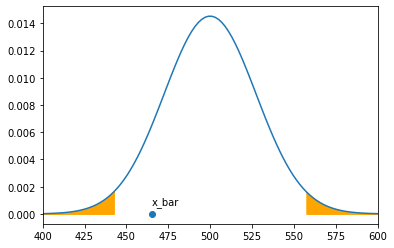

In [145]:
# Defining the x minimum and x maximum
x_min = 400
x_max = 600

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis

**Q2. You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?**

**Step - 2: Collect a sample of size N  Compute sample mean $ \bar{x} \  $**
* Let us take 10 user ratings to form a sample i.e. N = 10.
* Sample = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5] 

In [146]:
pop_mean = 4 #Given
l = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
N = len(l) #length of sample
sample_mean = sum(l)/len(l)  #formula
print("Sample Mean = {}".format(sample_mean))

Sample Mean = 4.25


**Step 3: Compute Test Statistic**                    
* Calculating t-score:    $t = \frac{\bar{x} - \mu}{{s}/\sqrt[2]{n}}$         
* Where s is standard deviation of the sample s:   $s = \sqrt[2]\frac{\sum{\bar{x} - \mu}}{{n-1}} $

In [147]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / len(l)**0.5
    return numerator / denomenator

In [148]:
sample_std=statistics.stdev(l)
print("Standard deviation = {}".format(sample_std))

Standard deviation = 0.8506963092234007


In [149]:
t_val = t_score(sample_size, sample_mean, pop_mean, sample_std)
print("T-score = {}".format(t_val))

T-score = 1.3142574813455419


**Step 4: Decide α or significance level**

In [150]:
confidence_interval = 0.95
alpha = 1 - confidence_interval

In [151]:
t_critical = t.ppf(1-alpha/2,df = N-1)     #df=degree of freedom --> N-1 = 10-1 = 9
print("T-critical value =  {}".format(t_critical))

T-critical value =  2.093024054408263


**Step 5.1: Calculating two tailed test**

In [152]:
if(np.abs(t_val) > t_critical):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


**Step 5.2: Compute p-value**

In [153]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_val)))
print("P-value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

P-value =  0.18875957054112558
Fail to reject Null Hypothesis


**Step 6: Ploting the sampling distribution with rejection regions**

Text(4.25, 0.1, 'x_bar')

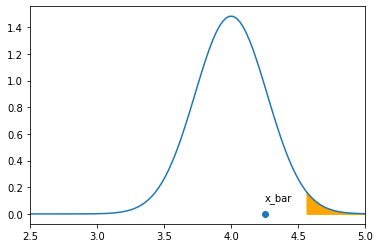

In [154]:
# Defining the x minimum and x maximum
# Defining the x minimum and x maximum
x_min = 2.5
x_max = 5.0

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

**Q3. TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?** 

**Step - 2: Collect a sample of size N  Compute sample mean $ \bar{x} \  $**
* Let us collect a 20 samples of milage values. i.e. N = 10.
* Sample = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38] 

In [155]:
pop_mean = 15 #Given
l = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
N = len(l) #length of sample
sample_mean = sum(l)/len(l)  #formula
print("Sample Mean = {}".format(sample_mean))

Sample Mean = 15.098999999999998


**Step 3: Compute Test Statistic**                    
* Calculating t-score:    $t = \frac{\bar{x} - \mu}{{s}/\sqrt[2]{n}}$         
* Where s is standard deviation of the sample s:   $s = \sqrt[2]\frac{\sum{\bar{x} - \mu}}{{n-1}} $

In [156]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / len(l)**0.5
    return numerator / denomenator

In [157]:
sample_std=statistics.stdev(l)
print("Standard deviation = {}".format(sample_std))

Standard deviation = 1.0253671999517258


In [158]:
t_val = t_score(sample_size, sample_mean, pop_mean, sample_std)
print("T-score = {}".format(t_val))

T-score = 0.4317882018907915


**Step 4: Decide α or significance level**

In [159]:
confidence_interval = 0.95
alpha = 1 - confidence_interval

In [160]:
t_critical = t.ppf(1-alpha/2,df = N-1)     #df=degree of freedom --> N-1 = 10-1 = 9
print("T-critical value =  {}".format(t_critical))

T-critical value =  2.093024054408263


**Step 5.1: Calculating two tailed test**

In [161]:
if(np.abs(t_val) > t_critical):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


**Step 5.2: Compute p-value**

In [162]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_val)))
print("P-value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

P-value =  0.6658953551647
Fail to reject Null Hypothesis


**Step 6: Ploting the sampling distribution with rejection regions**

Text(15.098999999999998, 0.1, 'x_bar')

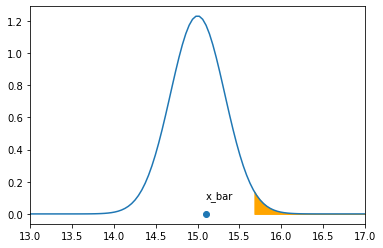

In [163]:
x_min = 13
x_max = 17

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

**Q4. You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?** 

**Collect a sample of size N  Compute sample mean $ \bar{x} \  $**
* Let us test the application for 100 times. i.e. N = 100.
* Sample = manually

In [164]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
pop_std = 10

In [165]:
alpha = 1 - 0.99
t_critical = t.ppf(1-alpha, df = 99)
print(t_critical)

2.3646058614359737


In [166]:
t_val = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_val)

-10.903742471989858


In [167]:
if abs(t_val) < t_critical:
    print("Reject the null hypothesis.")
else:
    print('Fail to Reject the null hypothesis.')

Fail to Reject the null hypothesis.


In [168]:
p_value = 1.0 - norm.cdf(np.abs(t_val))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0
Reject Null Hypothesis


Text(97.5, 0.02, 'x_bar')

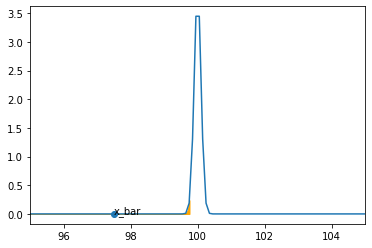

In [169]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis